In [ ]:
#imports
import os
import pandas as pd

In [25]:

os.chdir("/Users/kolbesussman/documents/repos/UmichDatathon2026")

#load dataset
tax_df = pd.read_csv("1. DatathonMasterStateTaxData_2004_2025Q2.csv")
econ_df = pd.read_csv("2. DatathonMasterEconomicDataset_2004_2025Q2.csv")
demo_df = pd.read_csv("3. (optional) DatathonAnnualDemographicsDataset.csv")


In [36]:
# creating descriptive labels for tax codes for grouping
tax_code_map = {
    "T01": "Property taxes",
    "T09": "General sales and gross receipts taxes",
    "T13": "Motor fuels taxes",
    "T10": "Alcoholic beverages (selective sales)",
    "T15": "Public utilities (selective sales)",
    "T12": "Insurance premiums taxes",
    "T16": "Tobacco products taxes",
    "T18": "Sports betting (including pari-mutuels)",
    "T11": "Amusements (selective sales)",
    "T19": "Other selective sales and gross receipts taxes",
    "T20": "Alcoholic beverages (license)",
    "T27": "Public utilities (license)",
    "T24": "Motor vehicles license taxes",
    "T25": "Motor vehicle operators license taxes",
    "T22": "Corporations in general license taxes",
    "T23": "Hunting and fishing license taxes",
    "T21": "Amusements (license)",
    "T28": "Occupation and business license taxes",
    "T29": "Other license taxes",
    "T40": "Individual income taxes",
    "T41": "Corporation net income taxes",
    "T50": "Death and gift taxes",
    "T53": "Severance taxes",
    "T51": "Documentary and stock transfer taxes",
    "T99": "Other taxes, not elsewhere classified"
}

tax_df["tax_code_description"] = tax_df["Tax_Code"].map(tax_code_map)

tax_df.head()

,Year,Quarter,State,Tax_Category,Tax_Code,Amount,tax_code_description
0,2004,1,Alabama,Property tax,T01,120297.0,Property taxes
1,2004,1,Alabama,General sales and gross receipts,T09,451925.0,General sales and gross receipts taxes
2,2004,1,Alabama,Alcoholic beverages,T10,32628.0,Alcoholic beverages (selective sales)
3,2004,1,Alabama,Amusements,T11,19.0,Amusements (selective sales)
4,2004,1,Alabama,Insurance,T12,54784.0,Insurance premiums taxes


In [37]:
# For each state, get the tax type with the highest total revenue
state_tax_sums = tax_df.groupby(["State", "tax_code_description"])["Amount"].sum().reset_index()

idx = state_tax_sums.groupby("State")["Amount"].idxmax()
highest_amount_per_state = state_tax_sums.loc[idx].reset_index(drop=True)


highest_amount_per_state.head(51)


,State,tax_code_description,Amount
0,Alabama,Individual income taxes,7.906855e+07
1,Alaska,Severance taxes,4.404383e+07
2,Arizona,General sales and gross receipts taxes,1.497459e+08
3,Arkansas,General sales and gross receipts taxes,7.373693e+07
4,California,Individual income taxes,1.713422e+09
5,Colorado,Individual income taxes,1.365900e+08
6,Connecticut,Individual income taxes,1.675950e+08
7,Delaware,Individual income taxes,3.299410e+07
8,District of Columbia,Property taxes,4.654256e+07
9,Florida,General sales and gross receipts taxes,5.477788e+08


In [38]:
print(econ_df.columns)
econ_df.head()

Index(['State', 'Year', 'Quarter', 'Population', 'Unemployment_Rate',
       'Civilian noninstitutional population', 'Total Civilian Labor Force',
       'Total Employed Civilian Labor Force',
       'Total Unemployed Civilian Labor Force',
       '% Civilian Labor Force Unemployed', 'Personal_Income', 'Applications',
       'Formations', 'Births', 'GDP_Total', 'GDP_Accom_Food',
       'GDP_Admin_Waste', 'GDP_Ag_Fish_Hunt', 'GDP_Arts_Recreation',
       'GDP_Construction', 'GDP_Durable_Goods', 'GDP_Education',
       'GDP_Finance_Insurance', 'GDP_Gov_Federal', 'GDP_Gov_Military',
       'GDP_Gov_State_Local', 'GDP_Gov_Total', 'GDP_Healthcare_Social',
       'GDP_Information', 'GDP_Management', 'GDP_Manufacturing',
       'GDP_Mining_Oil_Gas', 'GDP_Nondurable_Goods', 'GDP_Other_Services',
       'GDP_Private_Total', 'GDP_Prof_Tech_Services', 'GDP_Real_Estate',
       'GDP_Retail', 'GDP_Transport_Warehousing', 'GDP_Utilities',
       'GDP_Wholesale', 'Housing_Price_Index'],
      dtype='

,State,Year,Quarter,Population,Unemployment_Rate,Civilian noninstitutional population,Total Civilian Labor Force,Total Employed Civilian Labor Force,Total Unemployed Civilian Labor Force,% Civilian Labor Force Unemployed,...,GDP_Nondurable_Goods,GDP_Other_Services,GDP_Private_Total,GDP_Prof_Tech_Services,GDP_Real_Estate,GDP_Retail,GDP_Transport_Warehousing,GDP_Utilities,GDP_Wholesale,Housing_Price_Index
0,Alabama,2005,1,4569805,4.90,3485077.0,2144592.0,2036967.0,107625.0,5.0,...,11175.4,4228.1,130929.6,8056.4,15986.5,11543.3,3894.8,3610.6,8704.1,171.20
1,Alabama,2005,2,4584599,4.50,3493724.0,2147431.0,2048262.0,99169.0,4.6,...,10742.9,4256.9,132981.0,8137.9,16269.2,11758.1,4081.0,3724.4,8803.7,173.90
2,Alabama,2005,3,4599393,4.23,3503938.0,2155116.0,2062598.0,92518.0,4.3,...,10851.1,4323.5,133724.4,8424.6,16304.1,11751.7,4203.6,3997.4,8941.7,177.63
3,Alabama,2005,4,4614187,4.20,3520686.0,2160905.0,2070202.0,90703.0,4.2,...,10991.4,4341.7,136549.2,8420.7,16044.4,12150.3,4364.7,3964.6,9270.8,182.52
4,Alabama,2006,1,4628981,4.13,3533952.0,2166286.0,2076274.0,90012.0,4.2,...,11194.8,4453.2,138031.6,8883.9,16160.8,12275.4,4427.9,4425.4,9299.3,187.19


In [39]:
print(demo_df.columns)
demo_df.head()

Index(['State', 'Year', 'Total Population', 'White Alone', 'Black Alone',
       'American Indian or Alaskan Native', 'Asian Alone',
       'Hawaiian or Pacific Islander Alone', 'Two or More Races',
       'Not Hispanic', 'Hispanic', 'Pop_Youth', 'Pop_Working', 'Pop_Senior',
       'Age_Median', 'Population', 'Lawful_Permanent_Residents',
       'Nonimmigrants', 'Naturalizations', 'Refugees', 'Asylees',
       'Lawful_Permanent_Residents_Per_Million', 'Nonimmigrants_Per_Million',
       'Naturalizations_Per_Million', 'Refugees_Per_Million',
       'Asylees_Per_Million'],
      dtype='object')


,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,...,Lawful_Permanent_Residents,Nonimmigrants,Naturalizations,Refugees,Asylees,Lawful_Permanent_Residents_Per_Million,Nonimmigrants_Per_Million,Naturalizations_Per_Million,Refugees_Per_Million,Asylees_Per_Million
0,Alabama,2005,4569805.0,3249443.0,1197062.0,27606.0,43406.0,3290.0,48998.0,4444983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2006,4628981.0,3283056.0,1215481.0,28666.0,46030.0,3710.0,52038.0,4491139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2007,4672840.0,3308005.0,1227620.0,29666.0,48454.0,3996.0,55099.0,4522188.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2008,4718206.0,3332141.0,1241613.0,30722.0,50683.0,4443.0,58604.0,4554497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2009,4757938.0,3353244.0,1252307.0,31825.0,53747.0,4796.0,62019.0,4581420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Merge tax with economic indicators
tax_econ = pd.merge(tax_df, econ_df, how="left", on=["State", "Year", "Quarter"])

# Merge with demographics (annual data)
tax_econ_demo = pd.merge(
    tax_econ,
    demo_df, 
    how="left", 
    on=["State", "Year"]
)

In [45]:
print(tax_econ_demo.columns)
tax_econ_demo.head()

Index(['Year', 'Quarter', 'State', 'Tax_Category', 'Tax_Code', 'Amount',
       'tax_code_description', 'Population_x', 'Unemployment_Rate',
       'Civilian noninstitutional population', 'Total Civilian Labor Force',
       'Total Employed Civilian Labor Force',
       'Total Unemployed Civilian Labor Force',
       '% Civilian Labor Force Unemployed', 'Personal_Income', 'Applications',
       'Formations', 'Births', 'GDP_Total', 'GDP_Accom_Food',
       'GDP_Admin_Waste', 'GDP_Ag_Fish_Hunt', 'GDP_Arts_Recreation',
       'GDP_Construction', 'GDP_Durable_Goods', 'GDP_Education',
       'GDP_Finance_Insurance', 'GDP_Gov_Federal', 'GDP_Gov_Military',
       'GDP_Gov_State_Local', 'GDP_Gov_Total', 'GDP_Healthcare_Social',
       'GDP_Information', 'GDP_Management', 'GDP_Manufacturing',
       'GDP_Mining_Oil_Gas', 'GDP_Nondurable_Goods', 'GDP_Other_Services',
       'GDP_Private_Total', 'GDP_Prof_Tech_Services', 'GDP_Real_Estate',
       'GDP_Retail', 'GDP_Transport_Warehousing', 'GDP_Ut

,Year,Quarter,State,Tax_Category,Tax_Code,Amount,tax_code_description,Population_x,Unemployment_Rate,Civilian noninstitutional population,...,Lawful_Permanent_Residents,Nonimmigrants,Naturalizations,Refugees,Asylees,Lawful_Permanent_Residents_Per_Million,Nonimmigrants_Per_Million,Naturalizations_Per_Million,Refugees_Per_Million,Asylees_Per_Million
0,2004,1,Alabama,Property tax,T01,120297.0,Property taxes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1,Alabama,General sales and gross receipts,T09,451925.0,General sales and gross receipts taxes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,1,Alabama,Alcoholic beverages,T10,32628.0,Alcoholic beverages (selective sales),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,1,Alabama,Amusements,T11,19.0,Amusements (selective sales),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,1,Alabama,Insurance,T12,54784.0,Insurance premiums taxes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
import statsmodels.api as sm
X = sales_tax[["GDP_Total", "Unemployment_Rate", "Population_x"]]
y = sales_tax["Amount"]

Xy = pd.concat([X, y], axis=1).dropna()
X = Xy[["GDP_Total", "Unemployment_Rate", "Population_x"]]
y = Xy["Amount"]

#X = X.fillna(method="ffill")  # forward fill
#X = X.fillna(method="bfill")  # backward fill
#y = y.fillna(0)  # or drop rows instead


X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1443.
Date:                Sun, 01 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:50:02   Log-Likelihood:            -3.1875e+05
No. Observations:               20910   AIC:                         6.375e+05
Df Residuals:                   20906   BIC:                         6.375e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.959e+04   1.83e+0

In [ ]:
tax_econ_demo['Year'].unique()


array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/254281699.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(state_data['Year'].astype(str) + 'Q' + state_data['Quarter'].astype(str)),
/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/254281699.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(state_data['Year'].astype(str) + 'Q' + state_data['Quarter'].astype(str)),
/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/254281699.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(s

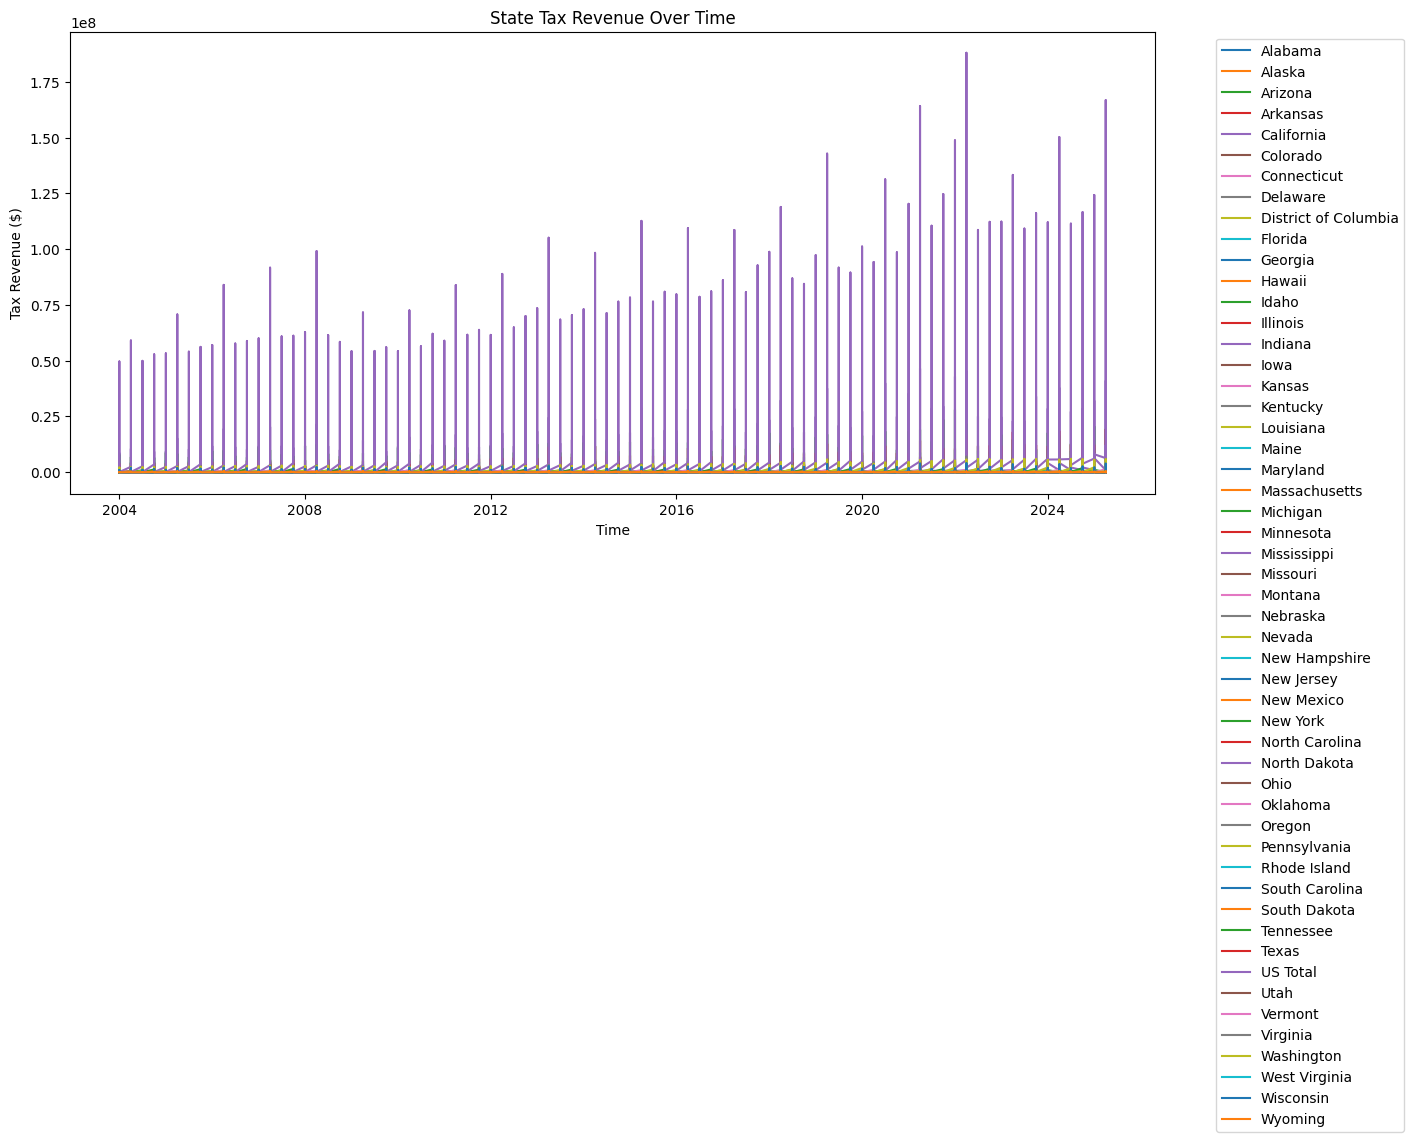

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame has the right data types
tax_econ_demo['Year'] = tax_econ_demo['Year'].astype(int)
tax_econ_demo['Quarter'] = tax_econ_demo['Quarter'].astype(int)

# 1. Tax Revenue over Time by State
plt.figure(figsize=(14,6))
for state in tax_econ_demo['State'].unique():
    state_data = tax_econ_demo[tax_econ_demo['State'] == state].sort_values(['Year','Quarter'])
    plt.plot(
        pd.to_datetime(state_data['Year'].astype(str) + 'Q' + state_data['Quarter'].astype(str)),
        state_data['Amount'],
        label=state
    )
plt.title("State Tax Revenue Over Time")
plt.xlabel("Time")
plt.ylabel("Tax Revenue ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


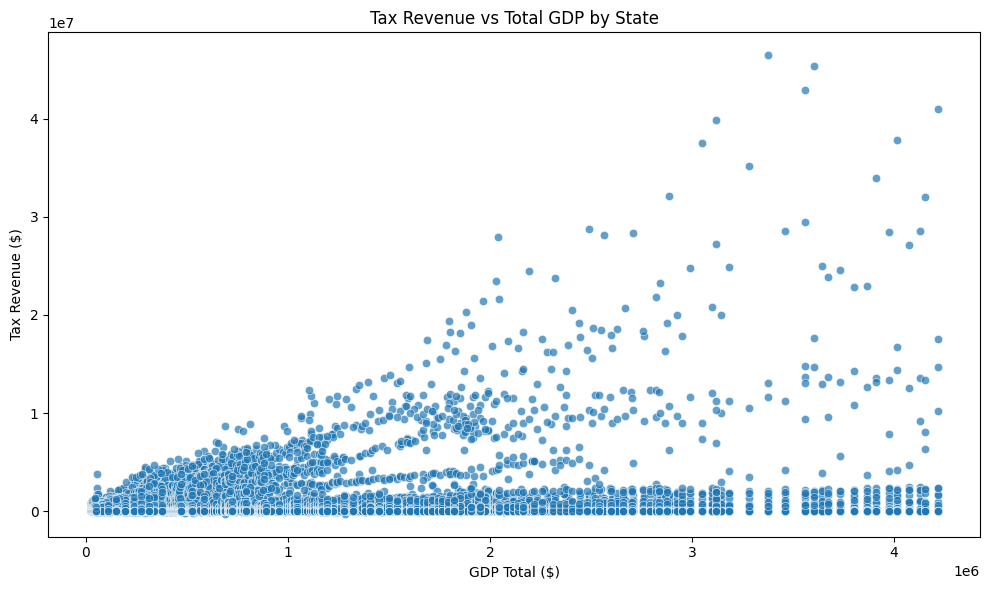

In [62]:


# 2. Scatter: Revenue vs Total GDP
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=tax_econ_demo, 
    x='GDP_Total', 
    y='Amount',
    alpha=0.7
)
plt.title("Tax Revenue vs Total GDP by State")
plt.xlabel("GDP Total ($)")
plt.ylabel("Tax Revenue ($)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/3541398859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


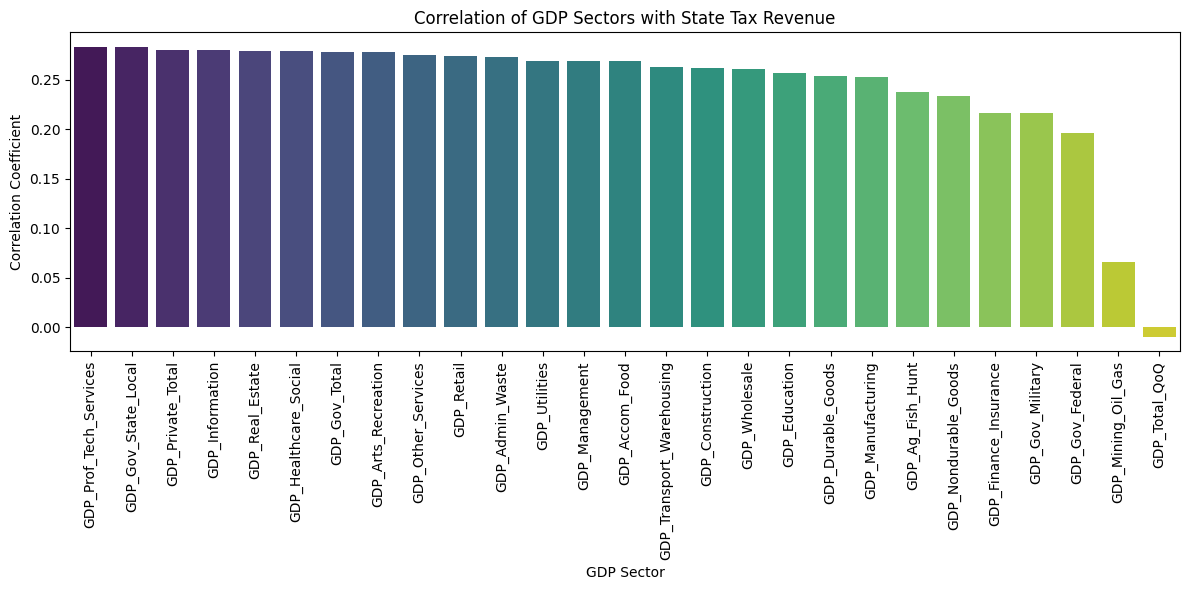

In [63]:

# 3. Estimate Revenue Elasticity by Sector (Simple Correlation)
gdp_sectors = [col for col in tax_econ_demo.columns if col.startswith('GDP_') and col != 'GDP_Total']
elasticity = {}
for sector in gdp_sectors:
    corr = tax_econ_demo['Amount'].corr(tax_econ_demo[sector])
    elasticity[sector] = corr

elasticity_df = pd.DataFrame.from_dict(elasticity, orient='index', columns=['Correlation_with_Revenue'])
elasticity_df = elasticity_df.sort_values('Correlation_with_Revenue', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=elasticity_df.reset_index(),       # reset index so 'index' becomes a column
    x='index',                              # now index is a column
    y='Correlation_with_Revenue',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title("Correlation of GDP Sectors with State Tax Revenue")
plt.ylabel("Correlation Coefficient")
plt.xlabel("GDP Sector")
plt.tight_layout()
plt.show()



/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/1643308315.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tax_econ_demo['GDP_Total_QoQ'] = tax_econ_demo.groupby('State')['GDP_Total'].pct_change()
/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/1643308315.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='magma')


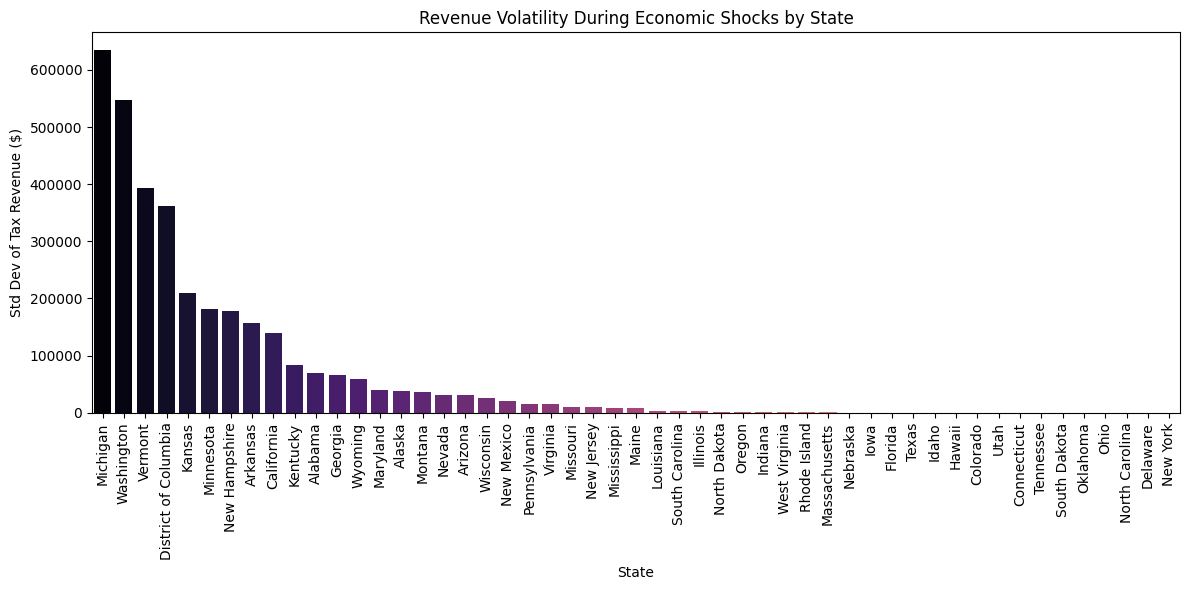

In [59]:

# 4. Revenue Volatility Across States (during economic shocks)
# Define a simple economic shock as negative GDP growth quarter-over-quarter
tax_econ_demo['GDP_Total_QoQ'] = tax_econ_demo.groupby('State')['GDP_Total'].pct_change()
shock_df = tax_econ_demo[tax_econ_demo['GDP_Total_QoQ'] < 0]

# Calculate standard deviation of revenue during shocks per state
volatility = shock_df.groupby('State')['Amount'].std().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility.index, y=volatility.values, palette='magma')
plt.xticks(rotation=90)
plt.title("Revenue Volatility During Economic Shocks by State")
plt.ylabel("Std Dev of Tax Revenue ($)")
plt.xlabel("State")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

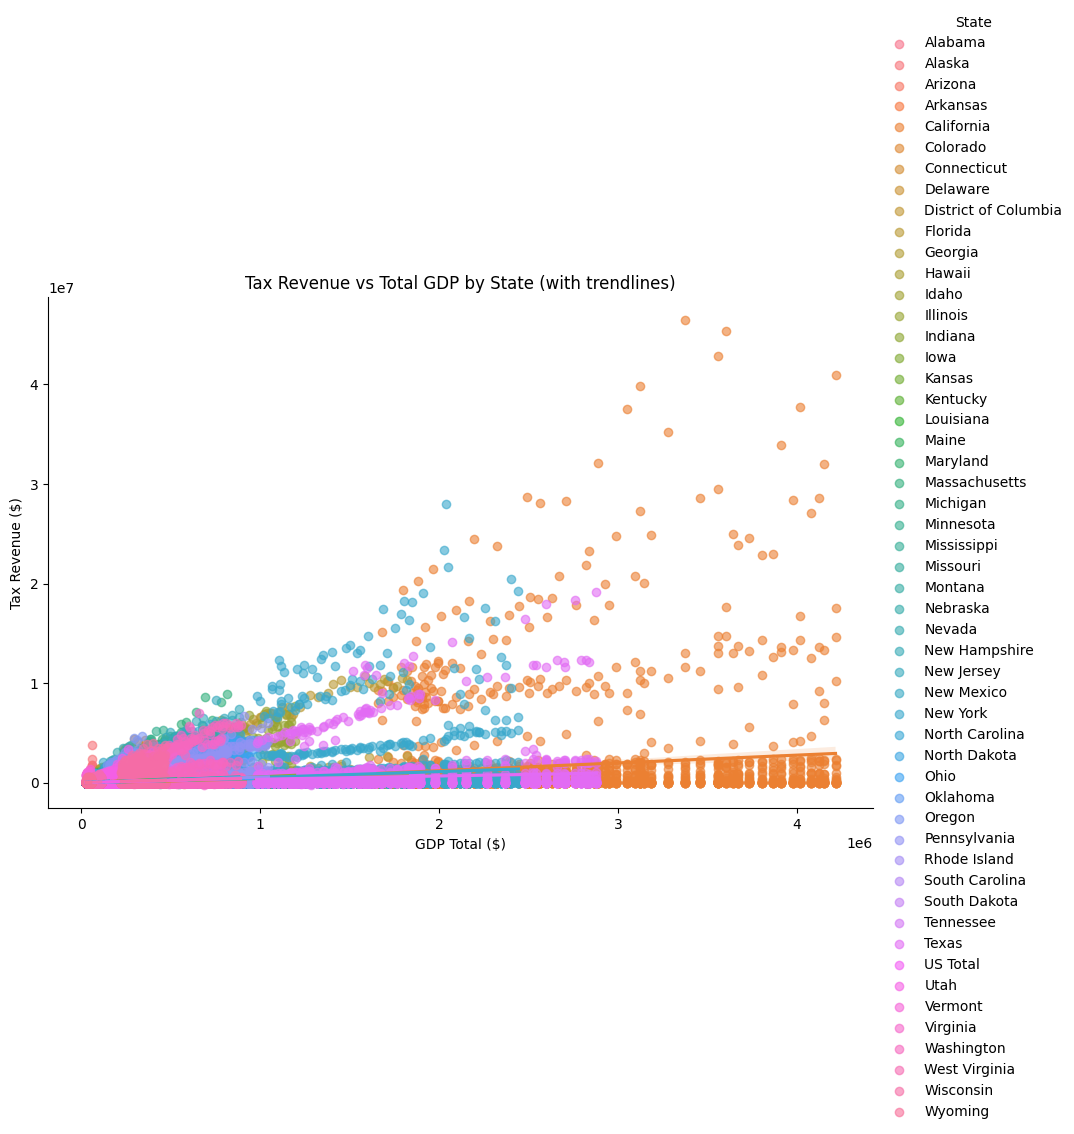

In [65]:
plt.figure(figsize=(10,6))
sns.lmplot(
    data=tax_econ_demo, 
    x='GDP_Total', 
    y='Amount', 
    hue='State', 
    height=6, 
    aspect=1.5, 
    scatter_kws={'alpha':0.6}, 
    markers='o'
)
plt.title("Tax Revenue vs Total GDP by State (with trendlines)")
plt.xlabel("GDP Total ($)")
plt.ylabel("Tax Revenue ($)")
plt.show()


/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/2040790456.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x=pd.to_datetime(tax_econ_demo['Year'].astype(str) + 'Q' + tax_econ_demo['Quarter'].astype(str)),
/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/2040790456.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


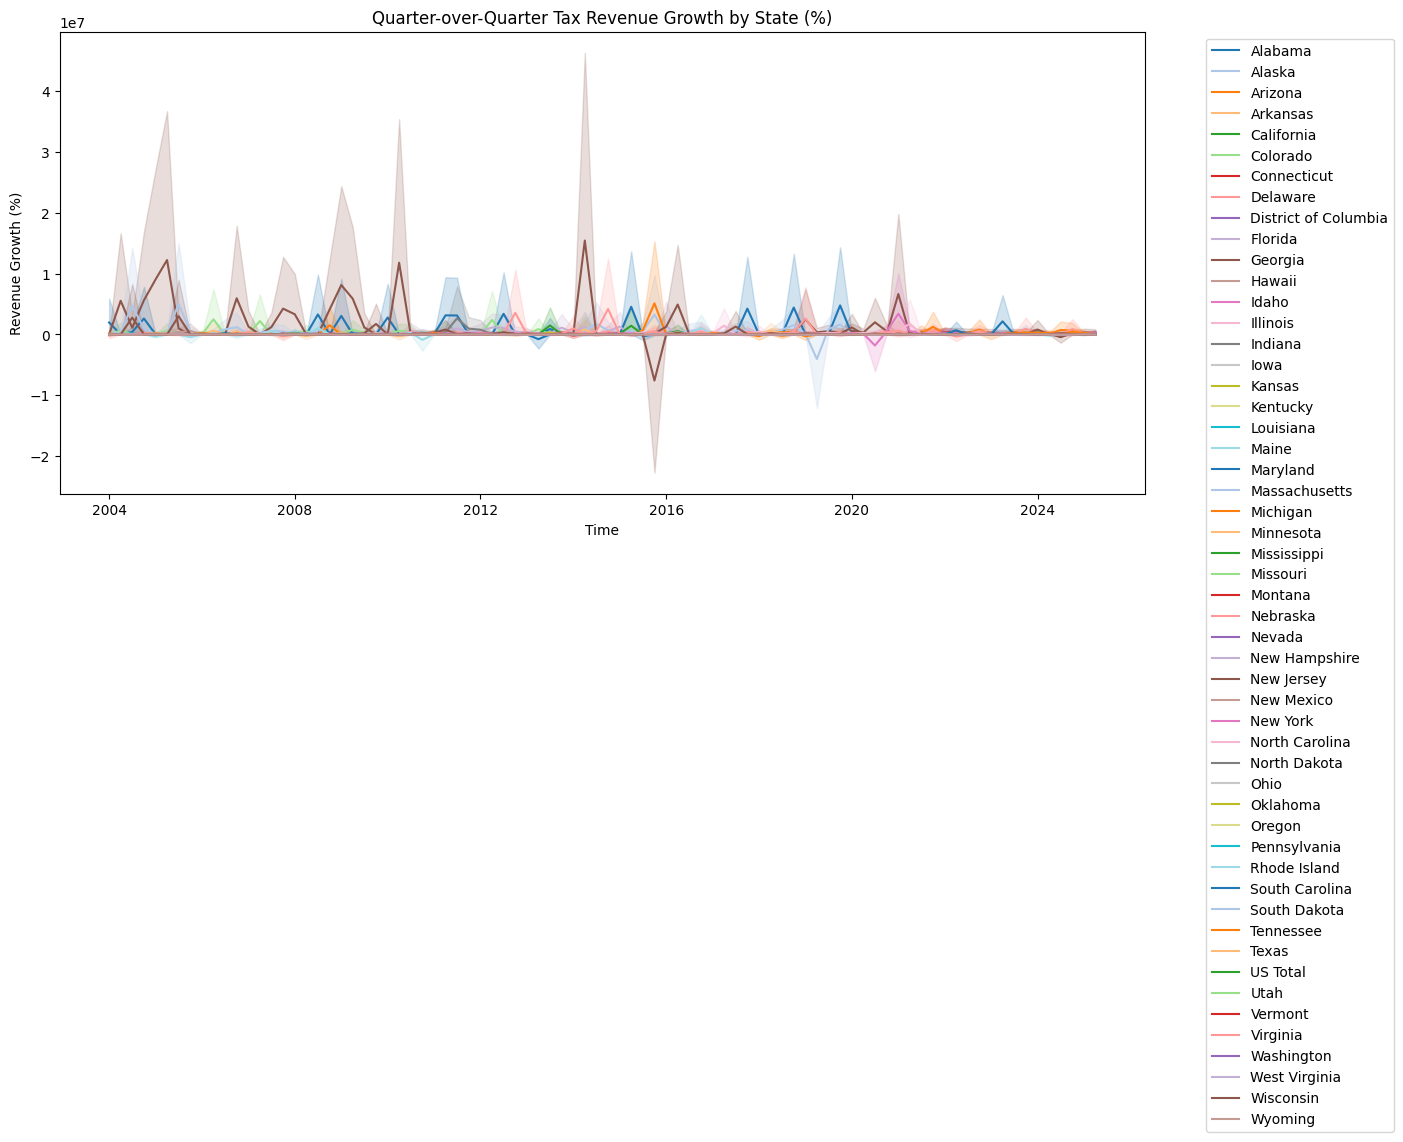

In [67]:
tax_econ_demo['Revenue_QoQ'] = tax_econ_demo.groupby('State')['Amount'].pct_change() * 100  # % change
plt.figure(figsize=(14,6))
sns.lineplot(
    data=tax_econ_demo, 
    x=pd.to_datetime(tax_econ_demo['Year'].astype(str) + 'Q' + tax_econ_demo['Quarter'].astype(str)), 
    y='Revenue_QoQ', 
    hue='State',
    palette='tab20'
)
plt.title("Quarter-over-Quarter Tax Revenue Growth by State (%)")
plt.xlabel("Time")
plt.ylabel("Revenue Growth (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/950413578.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_total['Date'] = pd.to_datetime(df_total['Year'].astype(str) + 'Q' + df_total['Quarter'].astype(str))


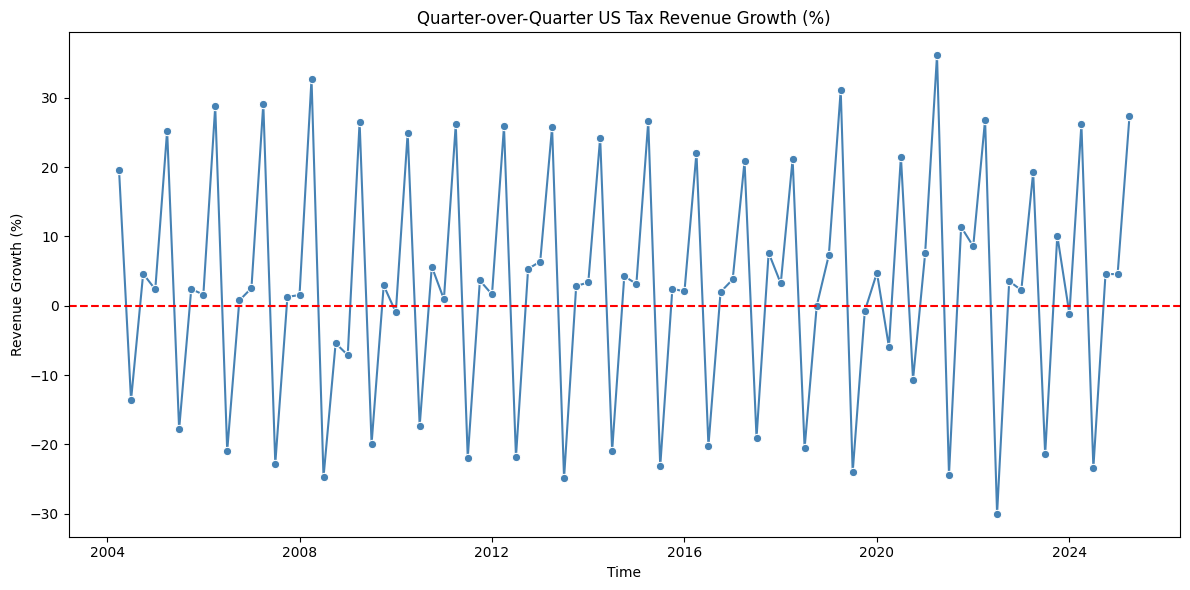

In [68]:
df_total_US = tax_econ_demo[tax_econ_demo['State'] == "US Total"]

# Aggregate tax revenue across all states per quarter
df_total = df_total_US.groupby(['Year', 'Quarter'])['Amount'].sum().reset_index()

# Compute quarter-over-quarter growth (%)
df_total['Revenue_QoQ'] = df_total['Amount'].pct_change() * 100

# Create a datetime column for plotting
df_total['Date'] = pd.to_datetime(df_total['Year'].astype(str) + 'Q' + df_total['Quarter'].astype(str))

# Plot total US revenue growth
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_total, 
    x='Date', 
    y='Revenue_QoQ',
    marker='o',
    color='steelblue'
)
plt.title("Quarter-over-Quarter US Tax Revenue Growth (%)")
plt.xlabel("Time")
plt.ylabel("Revenue Growth (%)")
plt.axhline(0, color='red', linestyle='--')  # baseline at 0%
plt.tight_layout()
plt.show()


/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_46480/1757366586.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x=pd.to_datetime(tax_econ_demo['Year'].astype(str) + 'Q' + tax_econ_demo['Quarter'].astype(str)),


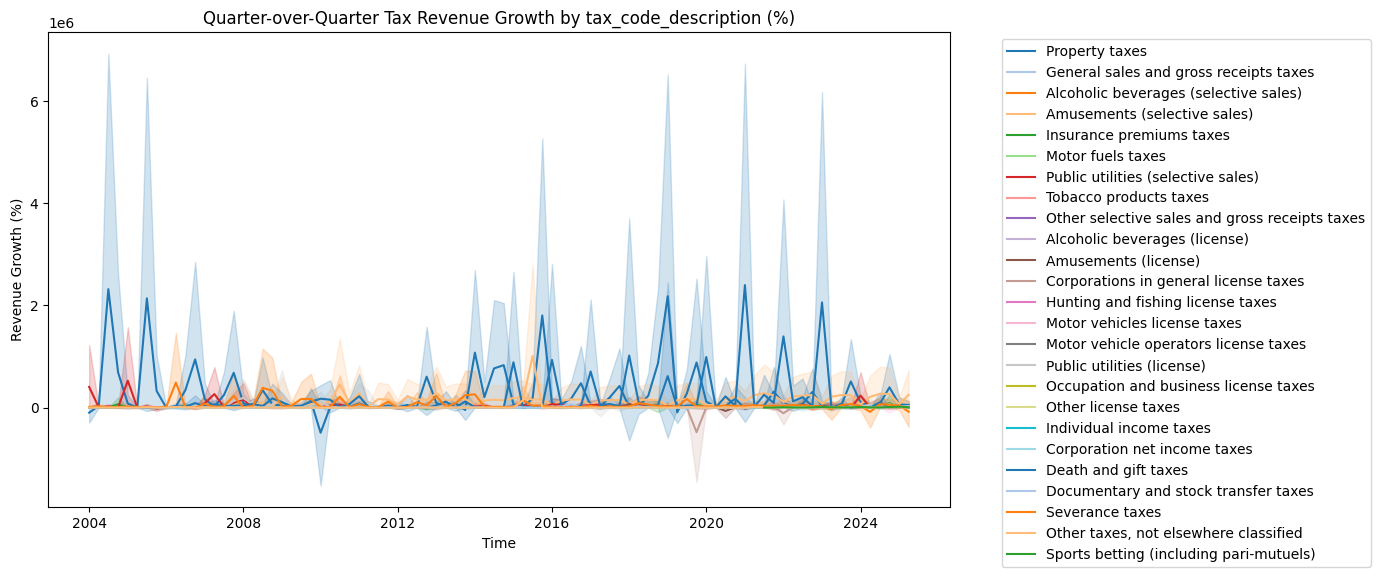

In [70]:
tax_econ_demo['Revenue_QoQ'] = tax_econ_demo.groupby('tax_code_description')['Amount'].pct_change() * 100  # % change
plt.figure(figsize=(14,6))
sns.lineplot(
    data=tax_econ_demo, 
    x=pd.to_datetime(tax_econ_demo['Year'].astype(str) + 'Q' + tax_econ_demo['Quarter'].astype(str)), 
    y='Revenue_QoQ', 
    hue='tax_code_description',
    palette='tab20'
)
plt.title("Quarter-over-Quarter Tax Revenue Growth by tax_code_description (%)")
plt.xlabel("Time")
plt.ylabel("Revenue Growth (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
